In [1]:
import os
import glob
import pandas as pd
import numpy as np 
import pingouin as pg 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")

#sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w'})
sns.set(style='whitegrid')

In [2]:
curr_dir = os.getcwd()
avg_dir = curr_dir +"/AVG" 

rating_data = pd.read_csv( avg_dir + "/Dynamic_Rating.csv", index_col=0).values
rating_data.shape

(52, 16)

In [3]:
data_list = os.listdir(avg_dir)
data_list = sorted([ data for data in data_list if not data.startswith(".") and data != 'Dynamic_Rating.csv' and not data.endswith(".npy")])

avg_data = { str(x).split(sep=".")[0] : pd.read_csv(f"{avg_dir}/{x}", index_col=0).values for x in data_list}

avg_arr = [ ]

for ind, x in avg_data.items() : 
    avg_arr.append(x.mean(axis=1)) # 52명 데이터를 평균내는 경우

avg_arr = np.array(avg_arr).T

for key in avg_data.keys() : 
    print (key)
    print(avg_data[key].shape)
    print("-"*20)

print("avg_data")
print(avg_arr.shape)

Blinking
(52, 16)
--------------------
Fixation_Duration
(52, 16)
--------------------
Fixation_Num
(52, 16)
--------------------
Saccade_Duration
(52, 16)
--------------------
left_iris
(52, 16)
--------------------
left_pupil
(52, 16)
--------------------
right_iris
(52, 16)
--------------------
right_pupil
(52, 16)
--------------------
avg_data
(52, 8)


In [4]:
# Block별 데이터 

data_list = os.listdir(avg_dir)
data_list = sorted([ data for data in data_list if not data.startswith(".") and data != 'Dynamic_Rating.csv' and not data.endswith(".npy")])

block_rating = rating_data.reshape(len(rating_data),-1,4).mean(axis=1).T # 52명 데이터를 평균내는 경우

avg_data = { str(x).split(sep=".")[0] : pd.read_csv(f"{avg_dir}/{x}", index_col=0).values for x in data_list}

block_arr = [ ]
for key, value in avg_data.items() : 
    block_arr.append(value.reshape(len(value),-1,4).mean(axis=1)) # 52명 데이터를 평균내는 경우

block_arr = np.array(block_arr).T
print(block_arr.shape) 
print("-"*20,"\n")


(4, 52, 8)
-------------------- 



In [5]:
# SSQ 데이터 
items = ['Bleary' , 'Dry_Eyed' , 'Eyestrain', 'Gritty', 'Eye_Ache', 'Sting', \
        'Heavy_Eyes', 'Hazy', 'Warm_Eyes', 'Flickering', 'Watery_Eyes', 'Feeling_heavy_in_the_head', 'Feel_heavy', \
        'Difficulty_concentrating', 'Dizzy', 'Stiff_shoulder', 'Stiff_neck', 'Sleepy', 'Vomiiting', 'Vertigo', 'Nausea', \
        'Difficulty_focussing', 'Double_vision', 'Near_vision_difficulty', \
        'Far_vision_difficulty', 'Pain_in_the_temple', 'Pain_in_the_middle_of_the_head', 'Pain_in_the_back_of_the_head' ]

ssq_arr = np.load(avg_dir+"/ssq.npy")

ssq_arr = ssq_arr[..., 1:]

ssq_arr.shape

(28, 52, 4)

In [6]:
# Dynamic ratign DF

arr = np.concatenate([avg_arr, rating_data.mean(axis=1).reshape(-1,1)], axis=1) # 52명 데이터를 평균내는 경우
print( "arr shape : ", arr.shape)

names = ['BN', 'FD', 'SCN','SCD', 'LIT', 'LPD', 'RIT', 'RPD', 'DR']
df = pd.DataFrame(np.concatenate([avg_arr, rating_data.mean(axis=1).reshape(-1,1)], axis=1 ), columns= names ) # 52명 데이터를 평균내는 경우
print("Dataframe shape :",df.shape)

arr shape :  (52, 9)
Dataframe shape : (52, 9)


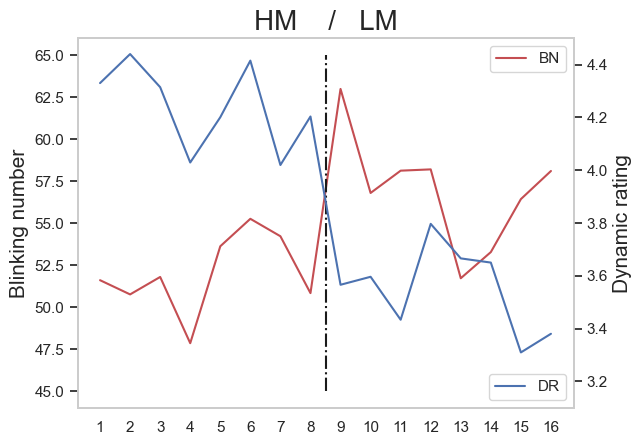

In [7]:
fig, ax1  = plt.subplots()

ax1.plot(range(16), avg_data['Blinking'].mean(axis=0), color ='r', label = 'BN')

ax2 = ax1.twinx()
ax2.plot(range(16), rating_data.mean(axis=0), label = 'DR', color ='b')

ax1.set_ylabel("Blinking number", fontsize = 15)
ax2.set_ylabel("Dynamic rating", fontsize = 15)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'lower right')

ax1.grid(False)
ax2.grid(False)

ax1.vlines(x=7.5,ymin=45, ymax=65, linestyles='dashdot', colors='k')
ax2.set_ylim(3.1,4.5)
plt.xticks(range(0,16),range(1,17))
plt.title("HM    /   LM", fontsize = 20)
plt.show()

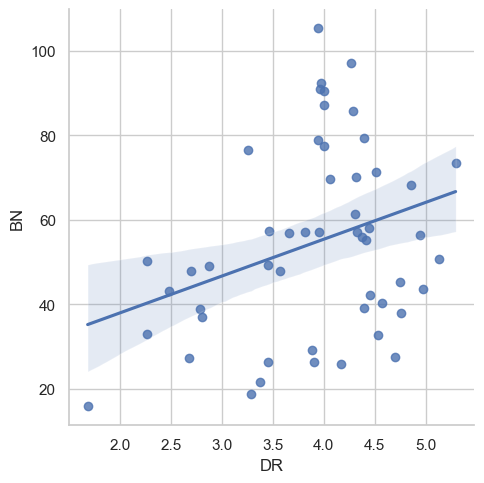

In [8]:
#plt.scatter( rating_data.mean(axis=1), avg_data['Blinking'].mean(axis=1))
data = pd.DataFrame(np.array([rating_data.mean(axis=1), avg_data['Blinking'].mean(axis=1)]).T, columns=['DR','BN'])
sns.lmplot(x='DR',y='BN', data=data)
plt.show()

In [9]:
rating_data.shape

(52, 16)

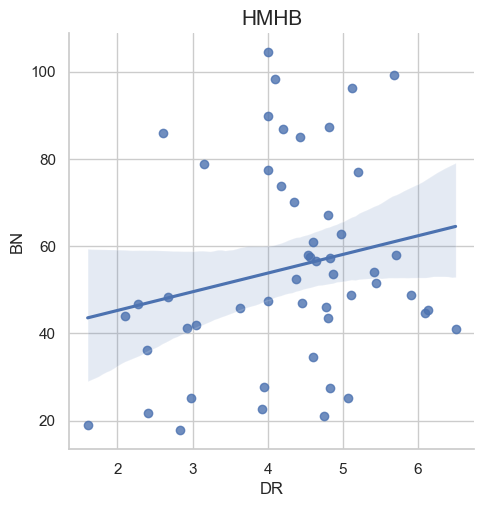

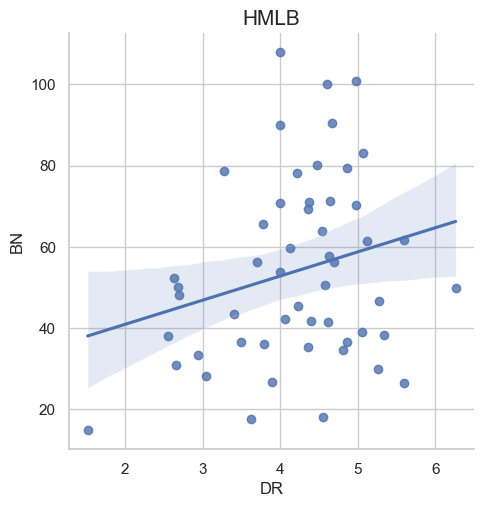

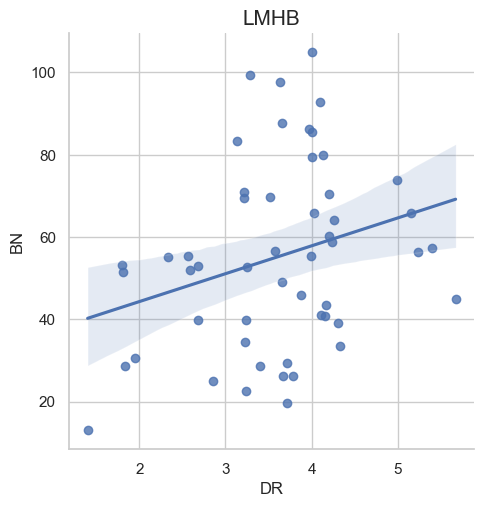

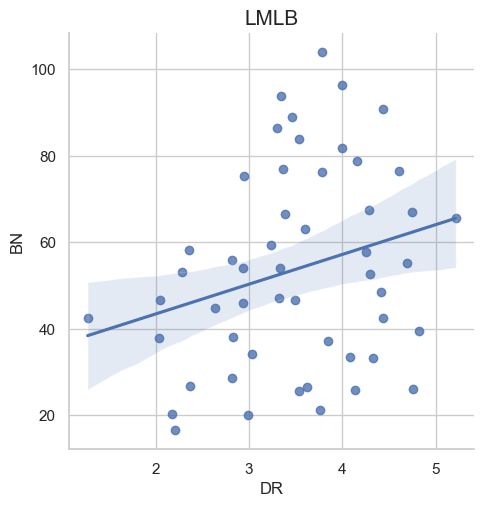

In [10]:
blocks = ["HMHB", "HMLB", "LMHB", "LMLB"]

for ind, block in enumerate(block_arr) :
    data = pd.DataFrame(np.array([rating_data[:,ind*4:ind*4+4].mean(axis=1), block[:,0]]).T, columns=['DR','BN'])
    sns.lmplot(x='DR',y='BN', data=data)
    plt.title(blocks[ind], fontsize = 15)


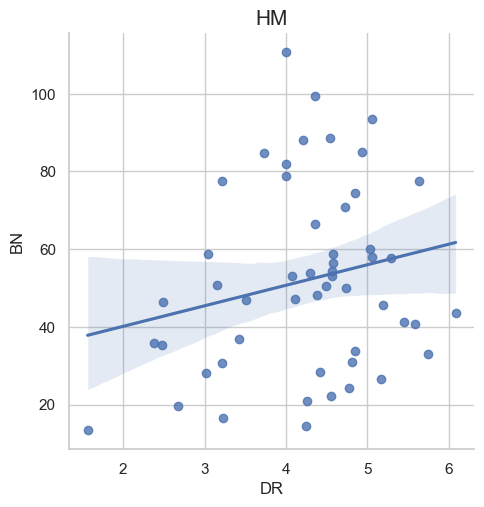

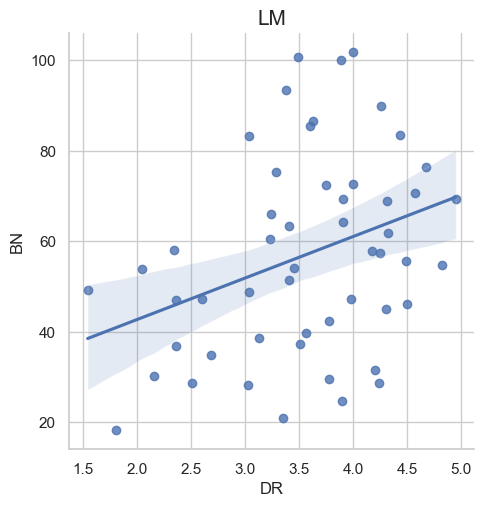

In [11]:
blocks = ["HM", "LM"]

for ind, block in enumerate(blocks) :
    data = pd.DataFrame(np.array([rating_data[:,ind*8:ind*8+8].mean(axis=1),avg_data['Blinking'][:,ind*8:ind*8+8].mean(axis=1)]).T, columns=['DR','BN'])
    sns.lmplot(x='DR',y='BN', data=data)
    plt.title(blocks[ind], fontsize = 15)

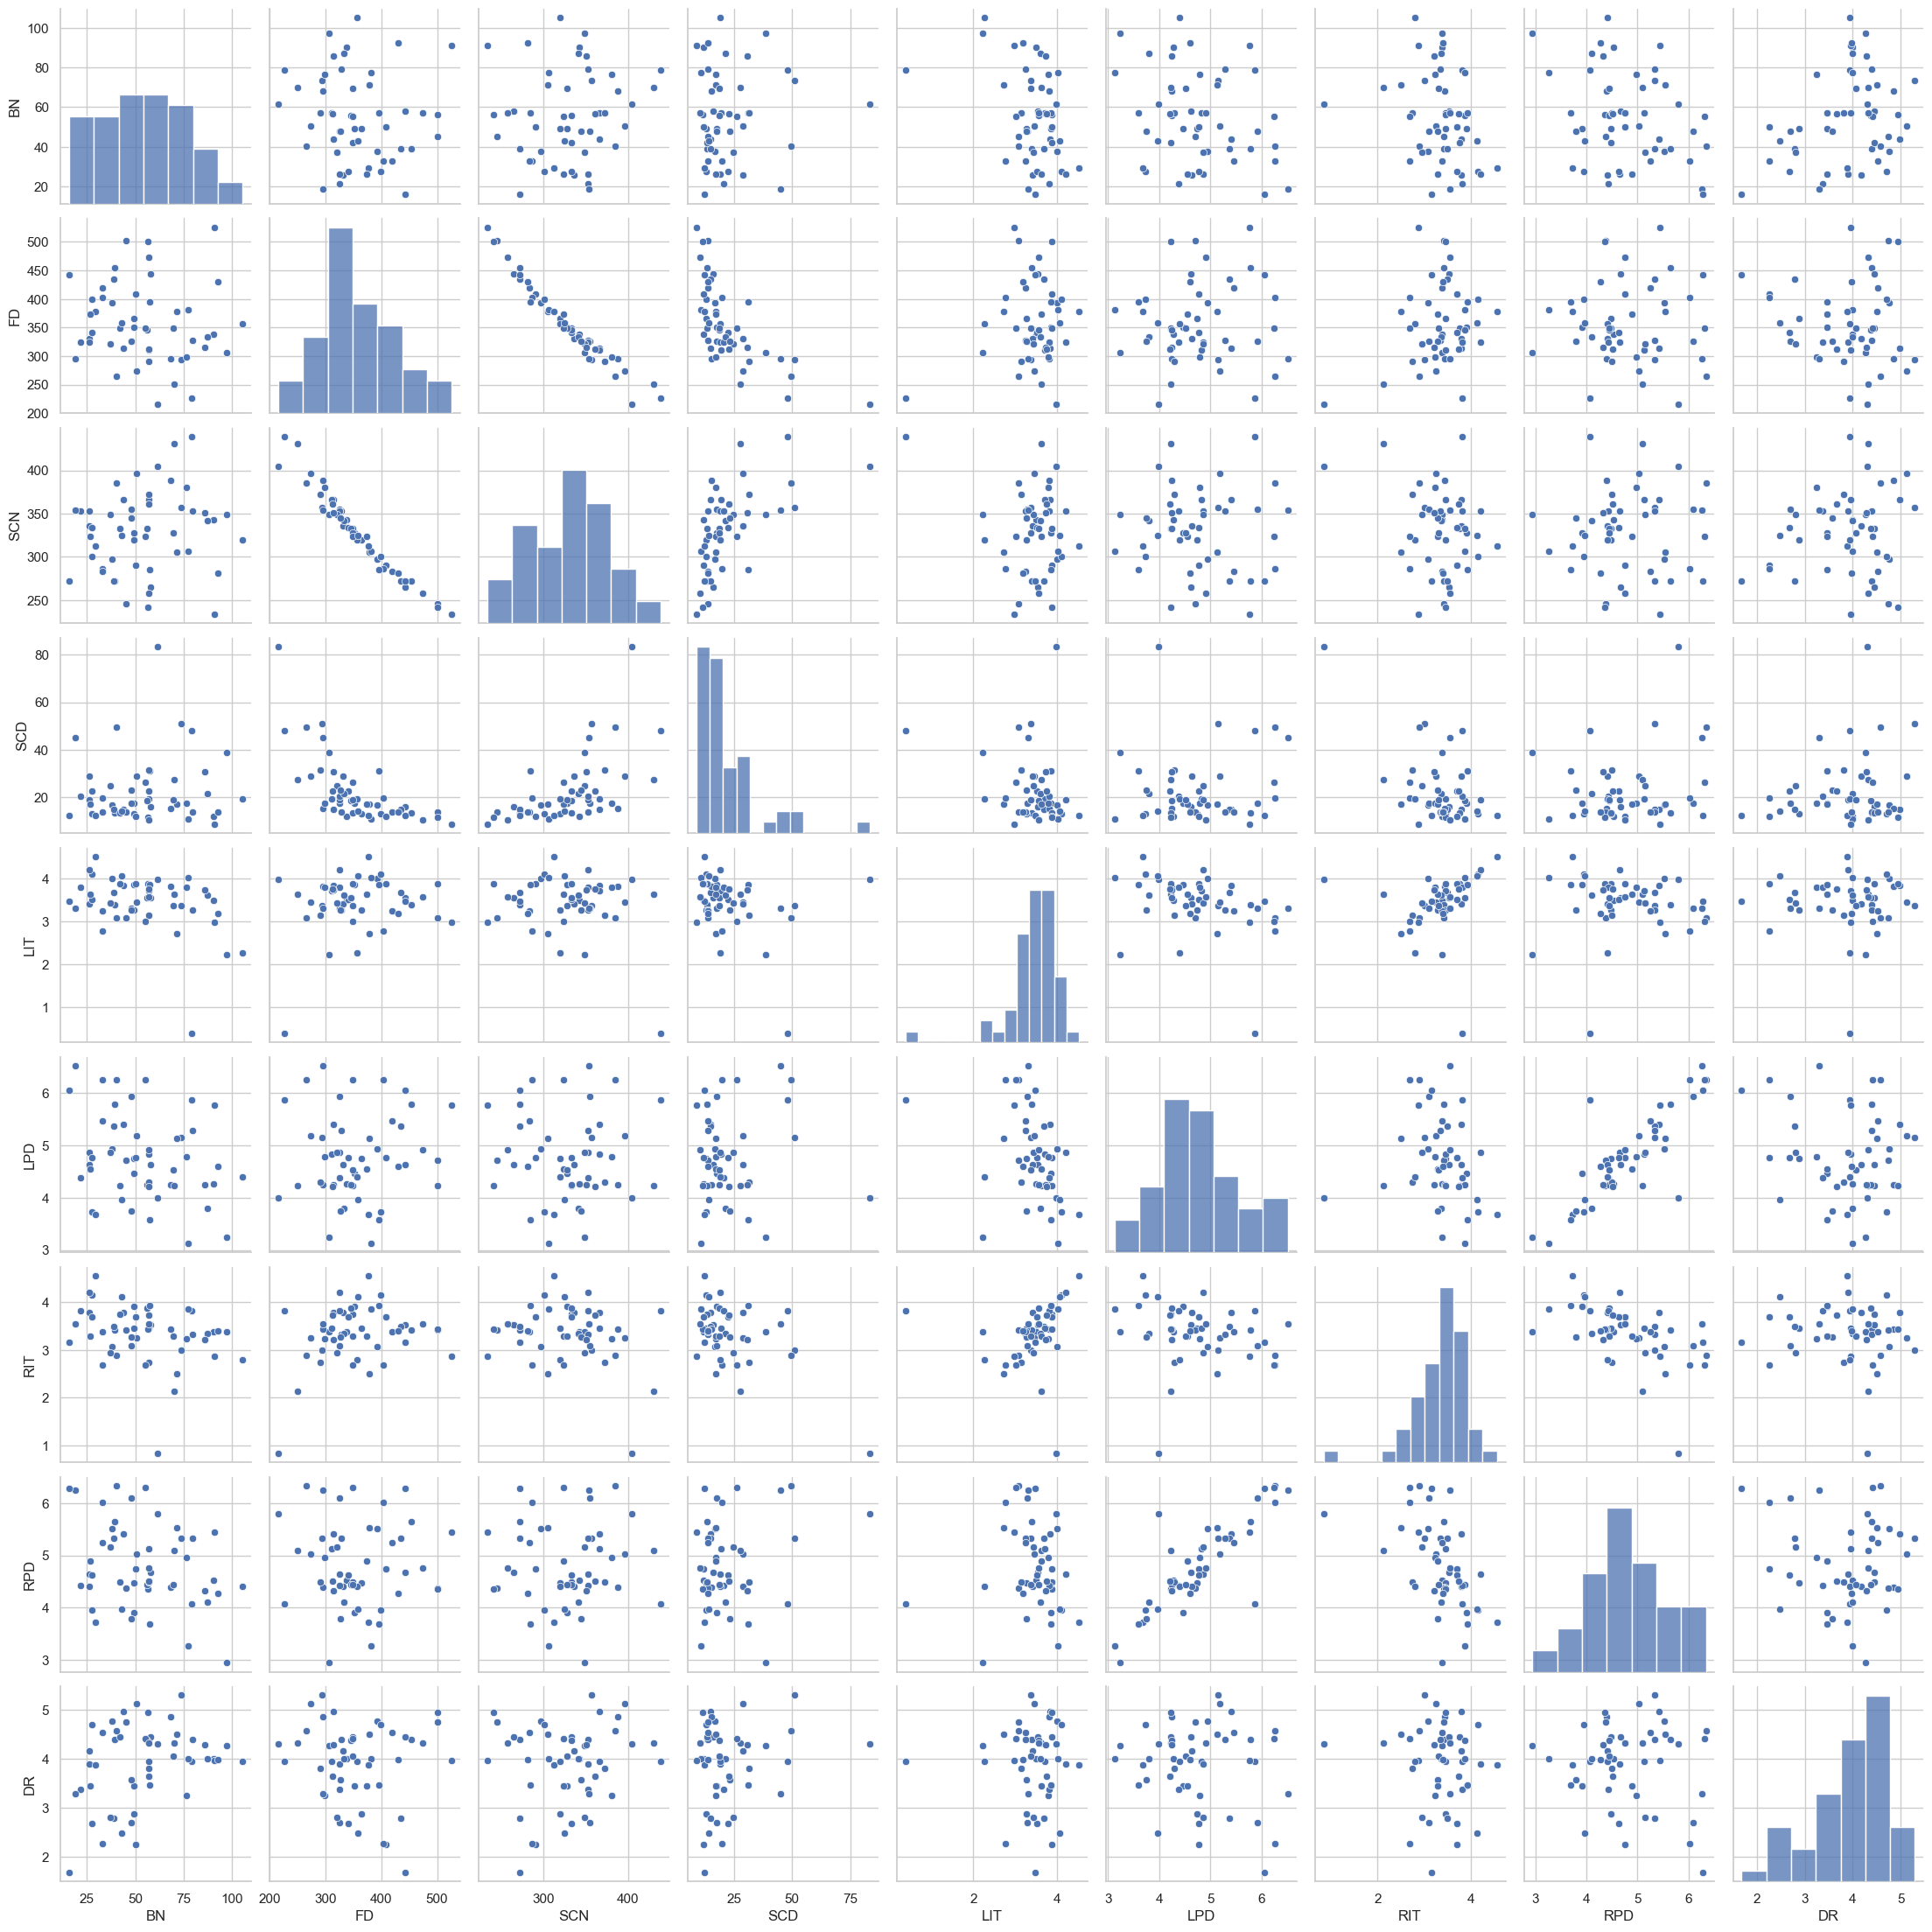

In [12]:
sns.pairplot(df)
plt.show(sns)

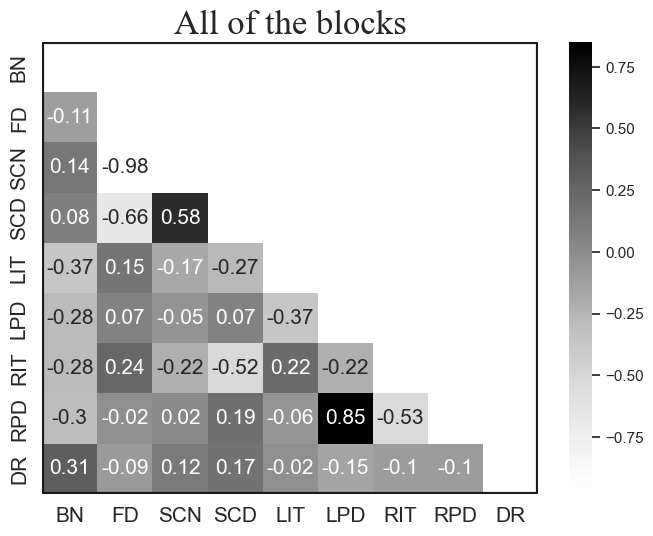

In [13]:
plt.figure( figsize=(8,11/15*8))

names = ['BN', 'FD', 'SCN','SCD', 'LIT', 'LPD', 'RIT', 'RPD', 'DR']
blocks = ["HMHB", "HMLB", "LMHB", "LMLB"]

corr = df.corr(method='pearson').round(2)
#_annot = corr.where(np.abs(corr).round(2) >= 0.4, 0 )
mask = np.triu(np.ones_like(corr, dtype=bool) )
heat = sns.heatmap(corr, mask=mask,cmap="Greys", annot= True , annot_kws= {'family' : 'Arial', 'size' : 15 })

heat.axhline(y=0, color='k',linewidth=3)
heat.axhline(y=corr.shape[1], color='k',linewidth=3)
heat.axvline(x=0, color='k',linewidth=3)
heat.axvline(x=corr.shape[0], color='k',linewidth=3)

heat.tick_params(labelsize = 15)
plt.title( "All of the blocks", fontsize = 25, family ='Times New Roman')

plt.show(heat)

In [14]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            if c == r:
                df_corr = df[[r]].dropna()
            else:
                df_corr = df[[r,c]].dropna()
            pvalues[r][c] = pearsonr(df_corr[r], df_corr[c])[1]
    return pvalues

def condtion(x) :
    if x < 0.05 and x > 0.01 : 
        return '*'
    
    elif x < 0.01 :
        return "**"
    
    else : return ''


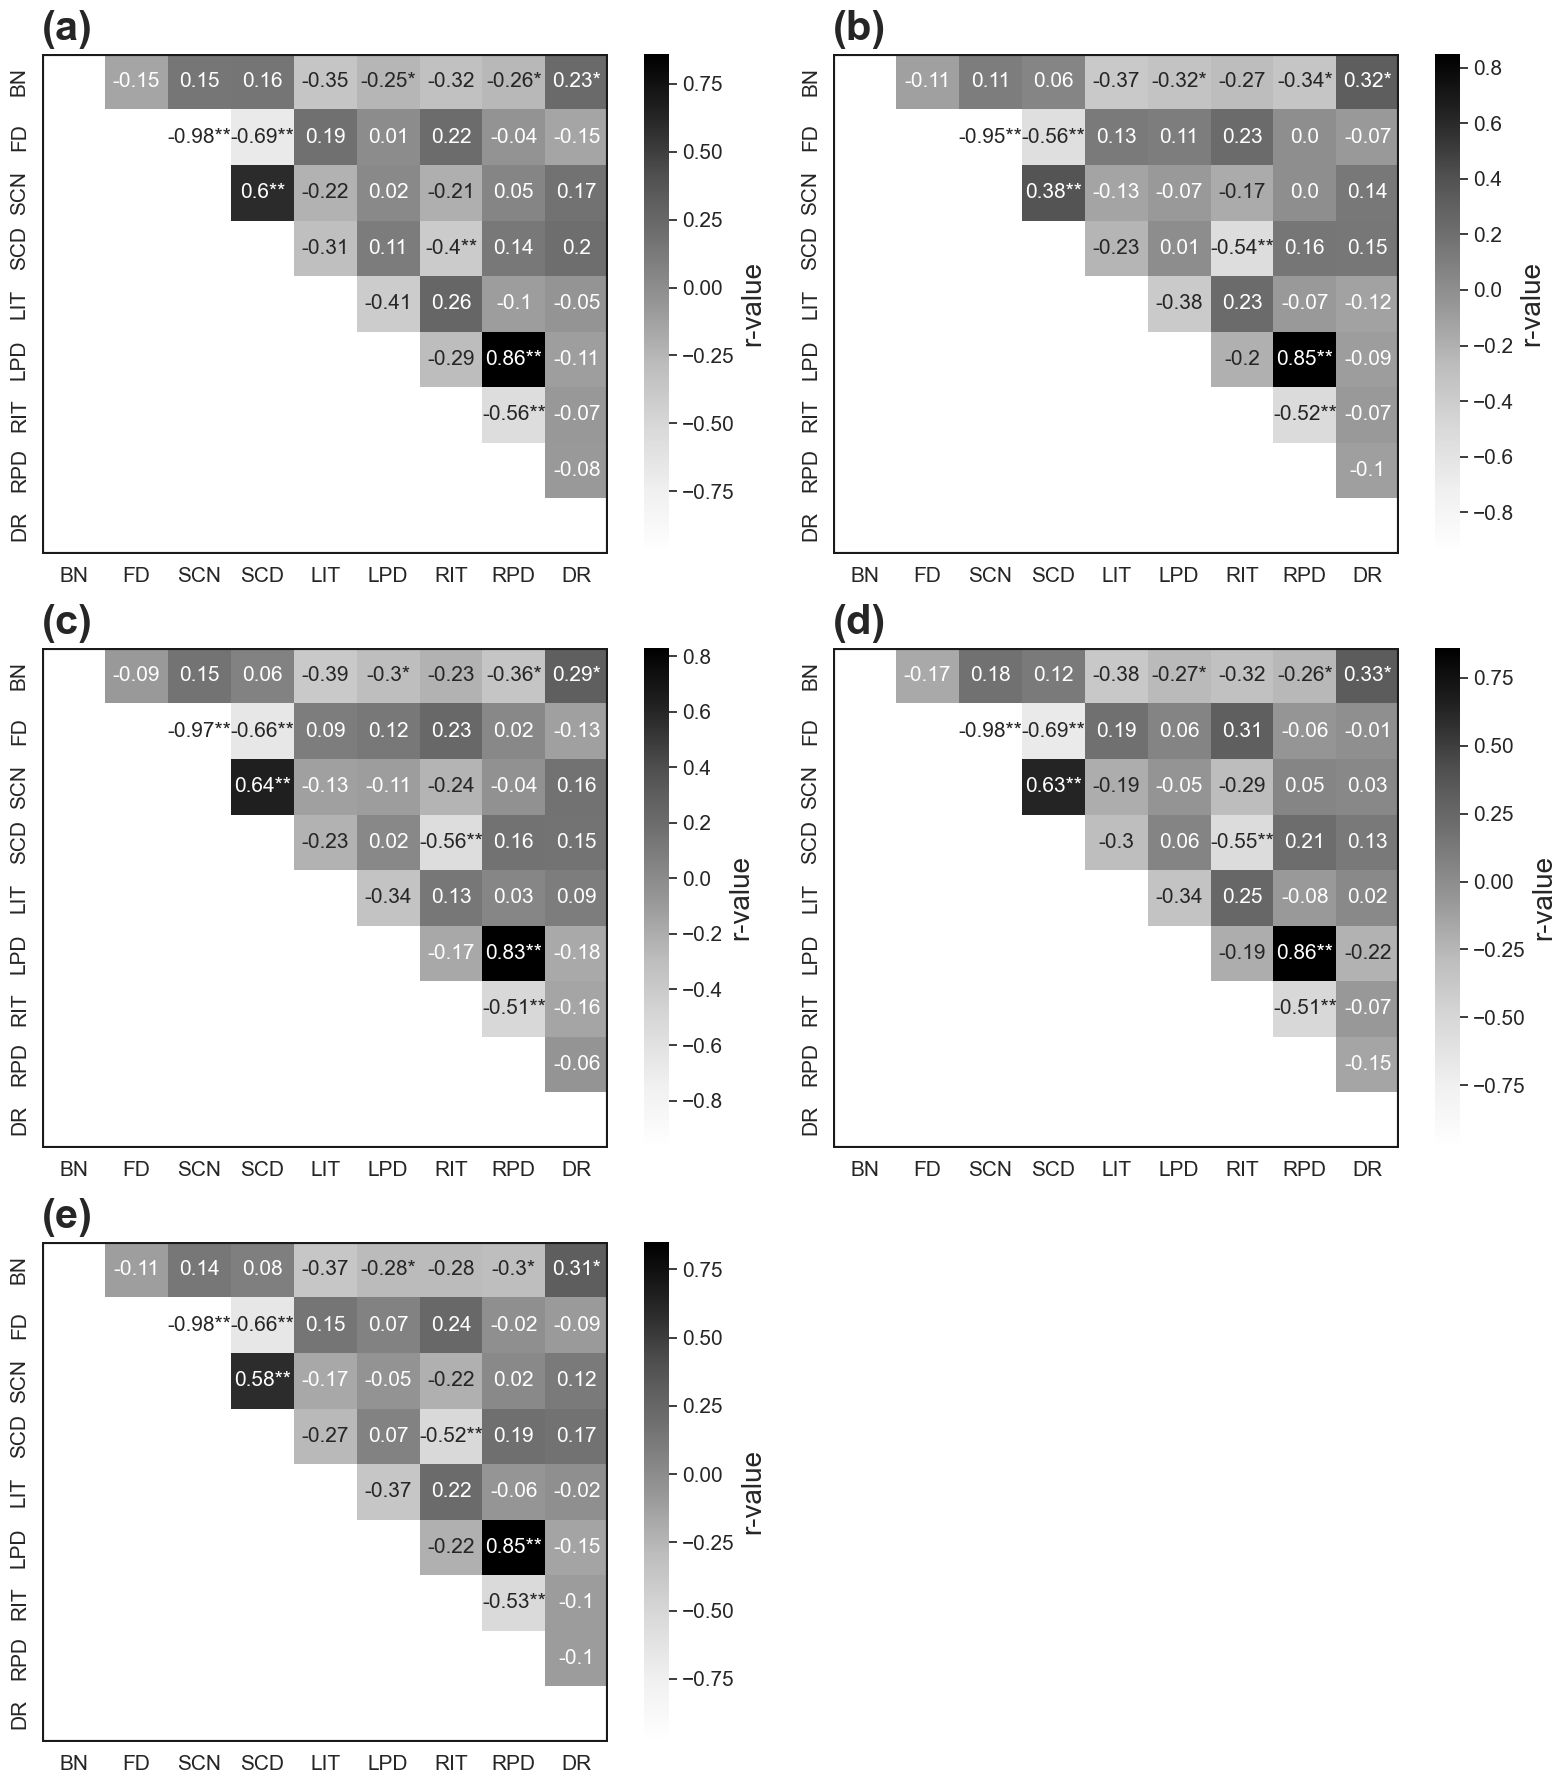

In [15]:
fig, axs = plt.subplots(3,2)
fig.set_size_inches(16,18)
axs = axs.flatten()

names = ['BN', 'FD', 'SCN','SCD', 'LIT', 'LPD', 'RIT', 'RPD', 'DR']
blocks = ["(a)", "(b)", "(c)", "(d)"]
#block_names = ["HMHB", "HMLB", "LMHB", "LMLB"]



for ind, block in enumerate(block_arr) :
    block_df = pd.DataFrame(np.concatenate((block_arr[ind], block_rating[ind].reshape(-1,1)), axis=1), columns=names)
    #block_df.to_csv(f"./{blocks[ind]}.csv")
    corr = block_df.corr('pearson').round(2)
    p = calculate_pvalues(df).round(2)
    _annot = corr.astype('str')
    p = p.applymap(lambda x : condtion(round(x,2)))
    _annot = np.array( [[f'{_annot.iloc[j,i]+p.iloc[j,i]}' for j in range(p.shape[1])] for i in range(p.shape[0])])

    mask = np.tril(np.ones_like(corr, dtype=bool))
    heat = sns.heatmap(corr, mask=mask,cmap="Greys", annot= _annot, cbar=True, ax=axs[ind], annot_kws= {'family' : 'Arial', 'size' : 15 }, cbar_kws={'label': 'r-value'},fmt='s')
    heat.tick_params(labelsize = 15)
    heat.figure.axes[-1].yaxis.label.set_size(20)
    heat.collections[0].colorbar.ax.tick_params(labelsize=15)

    axs[ind].set_title(blocks[ind], fontsize = 30, family ='Arial', weight ='bold' ,loc = 'left', pad = 10)

    heat.axhline(y=0, color='k',linewidth=3)
    heat.axhline(y=corr.shape[1], color='k',linewidth=3)
    heat.axvline(x=0, color='k',linewidth=3)
    heat.axvline(x=corr.shape[0], color='k',linewidth=3)

corr = df.corr().round(2)
p = calculate_pvalues(df).round(2)
_annot = corr.astype('str')
p = p.applymap(lambda x : condtion(round(x,2)))
_annot = np.array( [[f'{_annot.iloc[j,i]+p.iloc[j,i]}' for j in range(p.shape[1])] for i in range(p.shape[0])])

mask = np.tril(np.ones_like(corr, dtype=bool) )
heat = sns.heatmap(corr, mask=mask,cmap="Greys", annot= _annot , ax= axs[-2],annot_kws= {'family' : 'Arial', 'size' : 15 }, cbar_kws={'label': 'r-value'}, fmt='s')
heat.figure.axes[-1].yaxis.label.set_size(20)
heat.collections[0].colorbar.ax.tick_params(labelsize=15)

axs[-2].set_title("(e)", fontsize = 30, family ='Arial', weight ='bold' ,loc = 'left', pad = 10)

heat.axhline(y=0, color='k',linewidth=3)
heat.axhline(y=corr.shape[1], color='k',linewidth=3)
heat.axvline(x=0, color='k',linewidth=3)
heat.axvline(x=corr.shape[0], color='k',linewidth=3)

heat.tick_params(labelsize = 15)

fig.delaxes(axs[-1])


plt.tight_layout()
plt.show()

In [20]:
for col in df.columns :
    corr_df = pg.corr( df['DR'].values, df[col].values, method='pearson') 
    r,p = corr_df[['r','p-val']].iloc[0,:]

    if p < 0.05 :
        print(col)
        print(f"r = {r:.3f}, p = {p:.3f}")
        print("="*30)
        print("\n")


KeyError: 'DR'

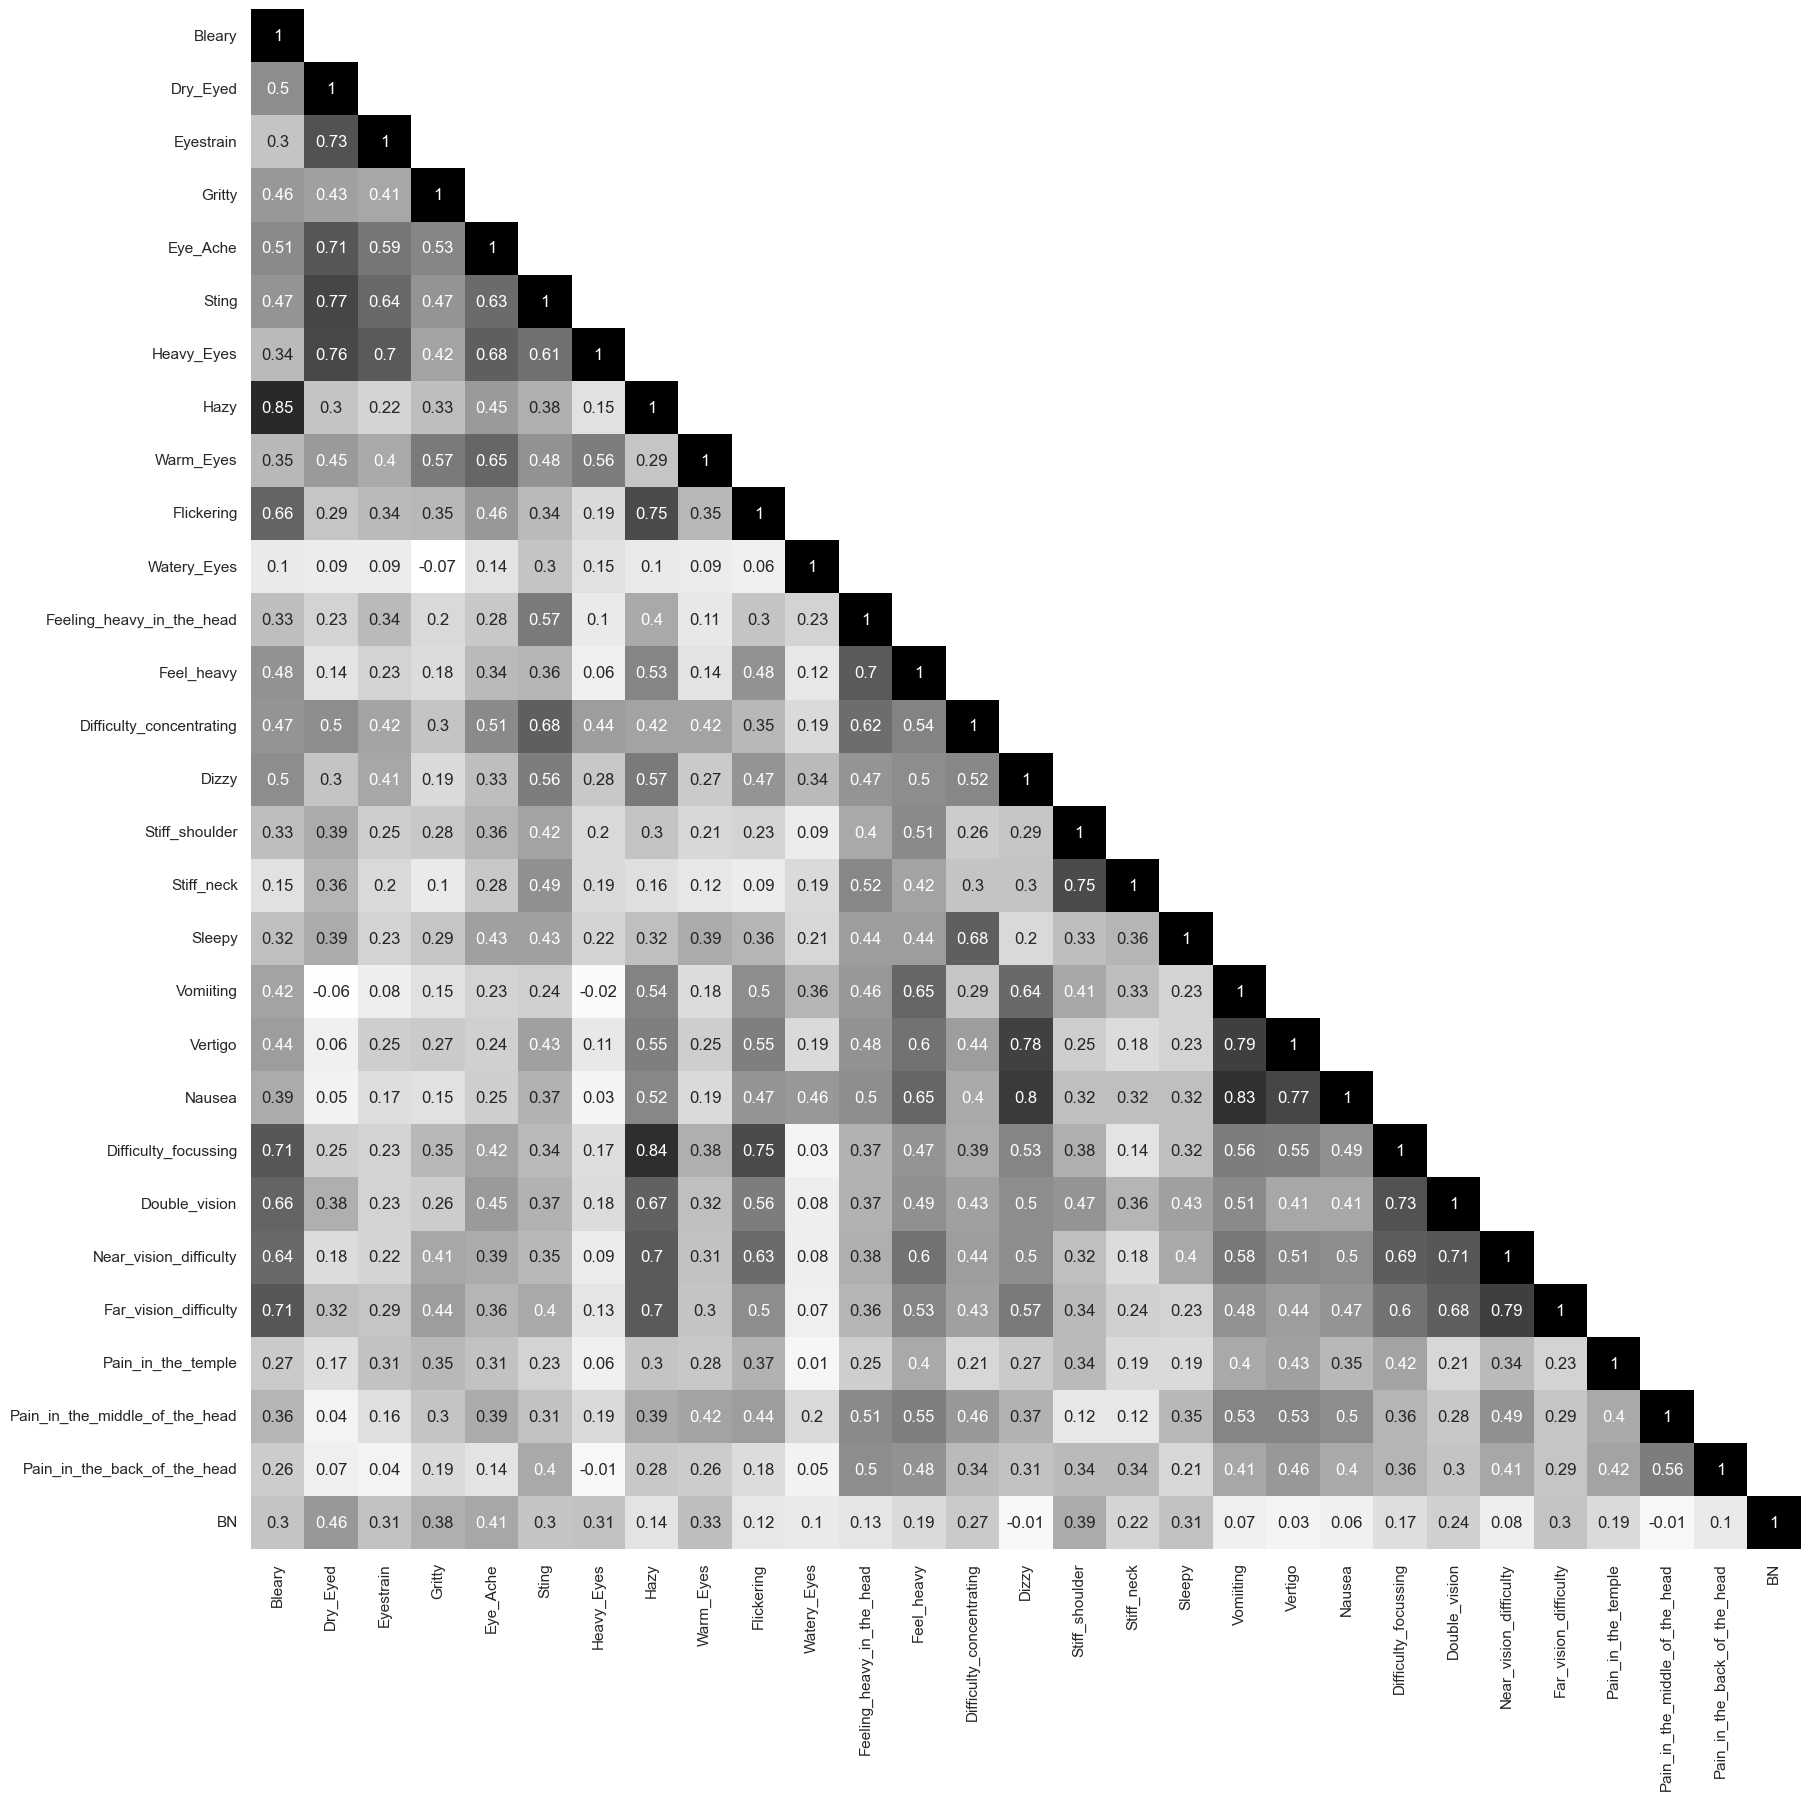

In [17]:
fig = plt.figure(figsize=(20,20))

cols = items.copy()
cols.append('BN')

corr_df = pd.DataFrame(np.concatenate([ssq_arr.mean(axis=2).T, df['BN'].values.reshape(-1,1)], axis=1), columns=cols)

corr = corr_df.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1 )
heat = sns.heatmap(corr, cmap="Greys", mask= mask ,annot= True, cbar=False )

plt.show()


In [18]:
# Dynamic rating & SSQ correlation 
for ind, ssq in enumerate(ssq_arr) :
    #df = pg.corr( rating_data.reshape(-1,4).mean(axis=1).flatten(),ssq.flatten())
    df = pg.corr( rating_data.mean(axis=1).flatten(),ssq.mean(axis=1)) 
    r,p = df[['r','p-val']].iloc[0,:]

    if p < 0.05 :
        print(items[ind])
        print(f"r = {r:.2f}, p = {p:.2f}")
        print("="*30)
        print("\n")


Dry_Eyed
r = 0.33, p = 0.02


Eyestrain
r = 0.28, p = 0.04


Gritty
r = 0.35, p = 0.01


Eye_Ache
r = 0.29, p = 0.04


Sting
r = 0.36, p = 0.01


Heavy_Eyes
r = 0.32, p = 0.02


Dizzy
r = 0.31, p = 0.02


Stiff_shoulder
r = 0.31, p = 0.03


Vertigo
r = 0.29, p = 0.04




In [19]:
# Eyet-tracking & SSQ correlation 

for key, value in avg_data.items() : 
    print(key)
    print("="*30)

    for ind, ssq in enumerate(ssq_arr) :
        #df = pg.corr(ssq.flatten(), value.reshape(-1,4).mean(axis=1).flatten())
        df = pg.corr(ssq.mean(axis=1), value.mean(axis=1))
        r,p = df[['r','p-val']].iloc[0,:]

        if p < 0.05 : 
            print(f"[{items[ind]}]")
            print(f"r = {r:.2f}, p = {p:.3f}")
            print("\n")

    print("-"*30)
    print("\n")

Blinking
[Bleary]
r = 0.30, p = 0.029


[Dry_Eyed]
r = 0.46, p = 0.001


[Eyestrain]
r = 0.31, p = 0.025


[Gritty]
r = 0.38, p = 0.006


[Eye_Ache]
r = 0.41, p = 0.003


[Sting]
r = 0.30, p = 0.029


[Heavy_Eyes]
r = 0.31, p = 0.024


[Warm_Eyes]
r = 0.33, p = 0.017


[Stiff_shoulder]
r = 0.39, p = 0.004


[Sleepy]
r = 0.31, p = 0.028


[Far_vision_difficulty]
r = 0.30, p = 0.032


------------------------------


Fixation_Duration
[Flickering]
r = 0.38, p = 0.006


[Difficulty_focussing]
r = 0.35, p = 0.012


------------------------------


Fixation_Num
[Flickering]
r = -0.38, p = 0.006


[Difficulty_focussing]
r = -0.34, p = 0.013


[Pain_in_the_middle_of_the_head]
r = -0.30, p = 0.034


------------------------------


Saccade_Duration
------------------------------


left_iris
------------------------------


left_pupil
[Gritty]
r = -0.31, p = 0.026


------------------------------


right_iris
[Feel_heavy]
r = -0.31, p = 0.024


[Sleepy]
r = -0.28, p = 0.041


[Nausea]
r = -0.29